In [1]:
import env
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode
                FROM sales
                LEFT JOIN items USING(item_id)
                LEFT JOIN stores USING(store_id)
                '''

In [3]:
from env import get_db_url
filename = 'store.csv'
url = get_db_url('tsa_item_demand')
df = pd.read_sql(query, url)
df.to_csv(filename, index=False)
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.8+ MB


<b><h1>Data Prep with Time Series

<b>Using your store items data:

Convert date column to datetime format.


In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)
df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode            object
dtype: object

Plot the distribution of sale_amount and item_price.


[Text(0.5, 1.0, 'Distribution of Sale Amount')]

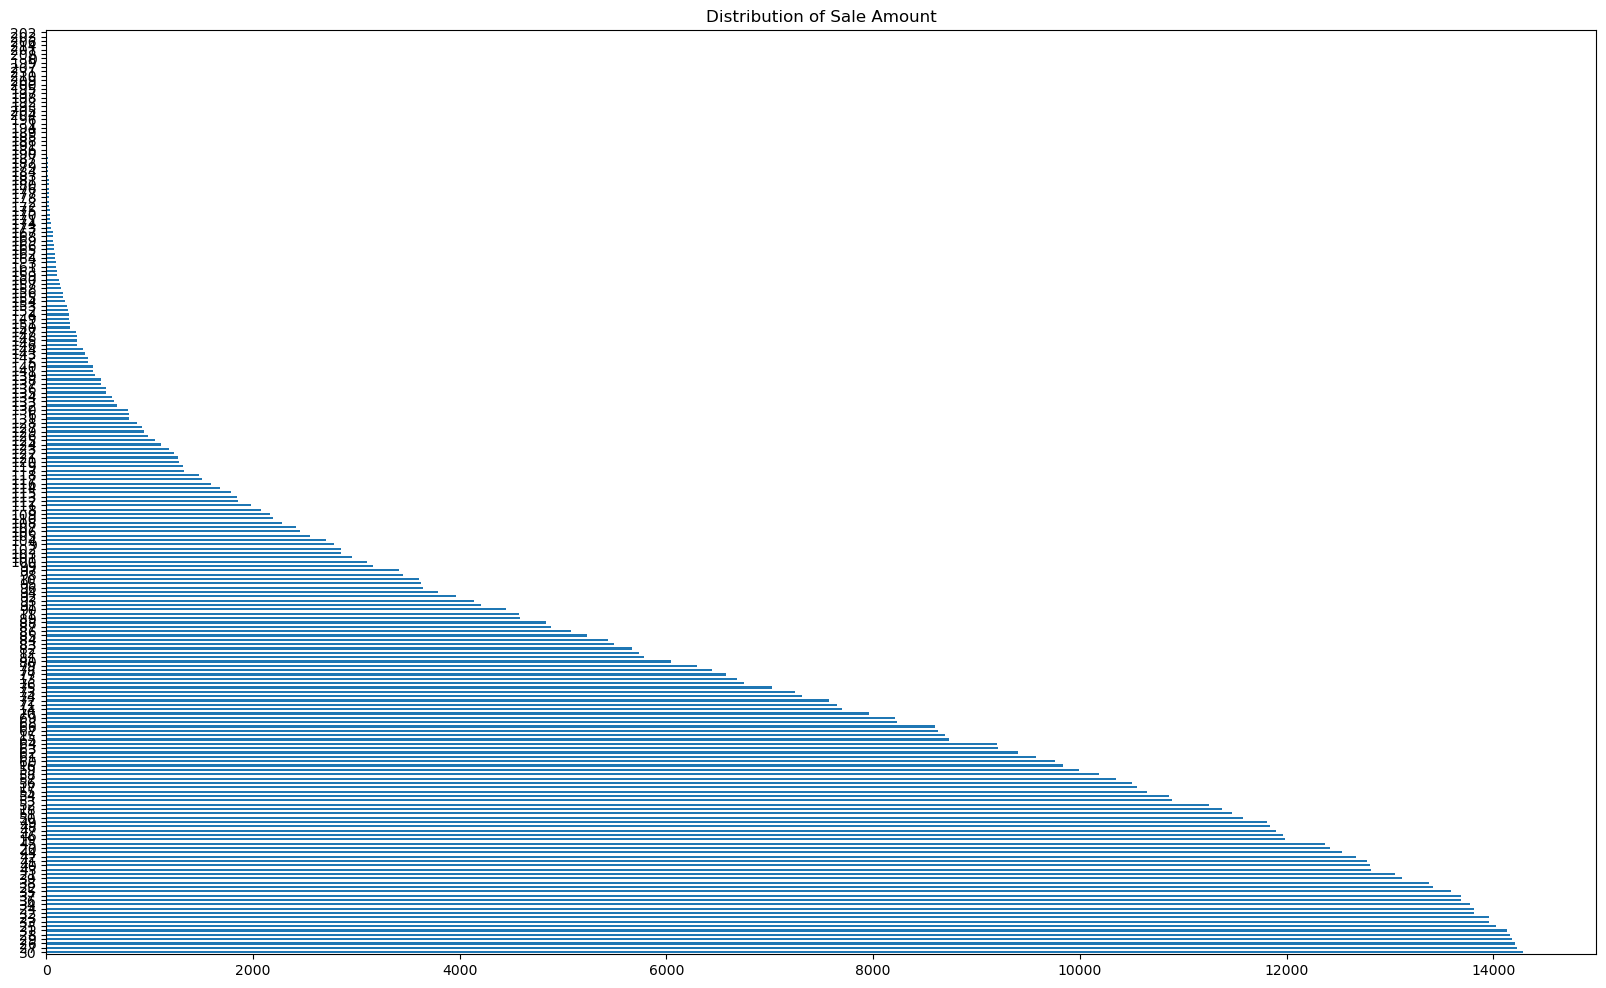

In [6]:
plt.figure(figsize=(20,12))
df['sale_amount'].value_counts().plot(kind='barh').set(title=f'Distribution of Sale Amount')

[Text(0.5, 1.0, 'Distribution of Item Price')]

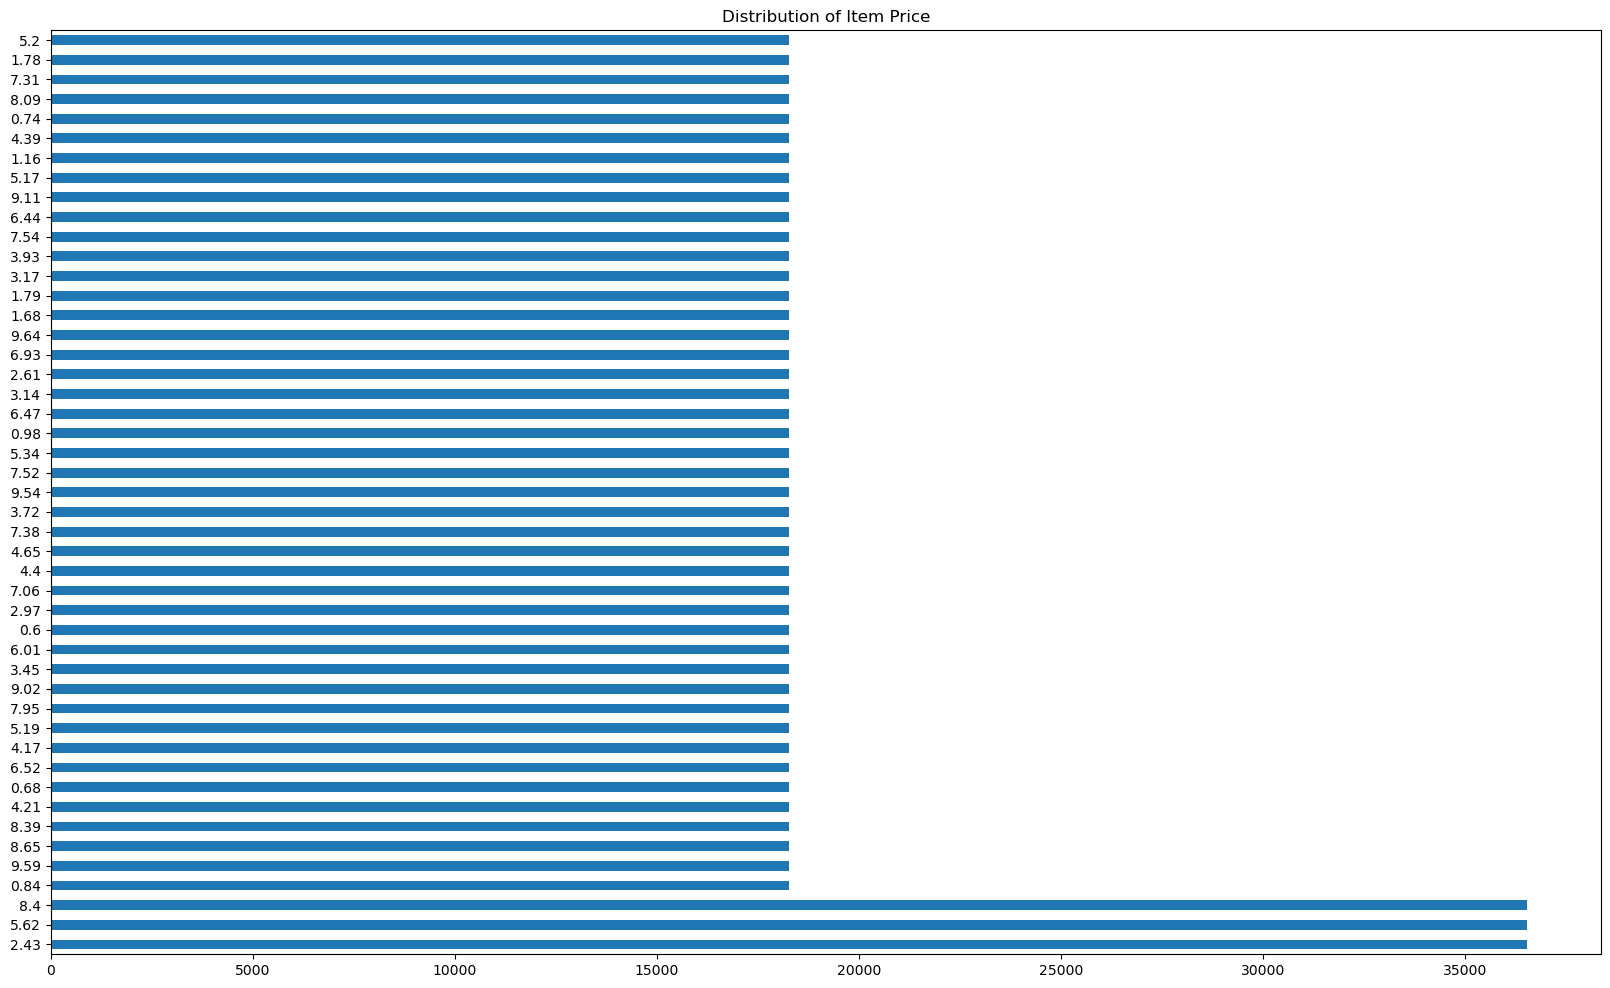

In [7]:
plt.figure(figsize=(20,12))
df['item_price'].value_counts().plot(kind='barh').set(title=f'Distribution of Item Price')

Set the index to be the datetime variable.


In [8]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


Add a 'month' and 'day of week' column to your dataframe.


In [9]:
#df['month'] = df.index.month_name()
#df['day_of_week'] = df.index.dayofweek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 48.8+ MB


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [10]:
df['sales_total'] = df['sale_amount'] * df['item_price']
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,sales_total
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9.24
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,11.76
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,8.40


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<b><h3>Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [11]:
csv_export_url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
ops = pd.read_csv(csv_export_url)
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [12]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


Convert date column to datetime format.


In [13]:
ops['Date'] = ops.Date.astype('datetime64')
ops.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Set the index to be the datetime variable.


In [14]:
ops = ops.set_index('Date')
ops.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Plot the distribution of each of your variables.


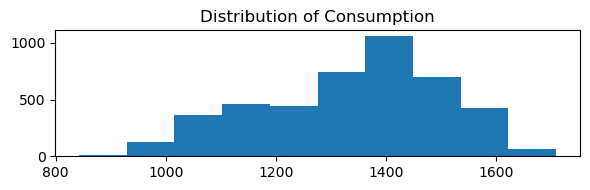

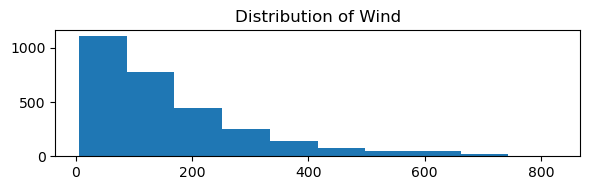

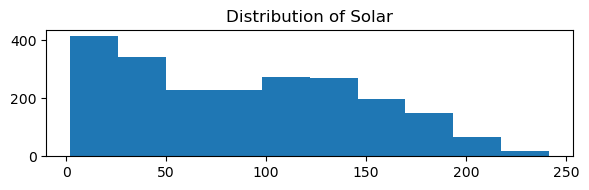

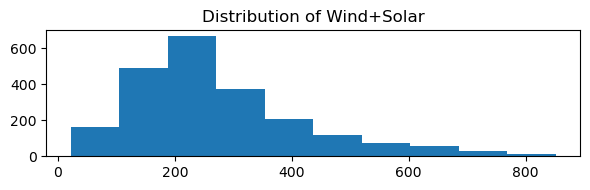

In [15]:
for col in ops:
    plt.figure(figsize = (6,2))
    plt.hist(ops[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout();

Add a month and a year column to your dataframe.


In [16]:
ops['month'] = ops.index.month
ops['year'] = ops.index.year
ops.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


Fill any missing values.


In [17]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [20]:
ops = ops.bfill(axis = 0)
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.
